### Dimension Reduction

#### Autoencoder

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

matrix = pd.read_csv('../Data/feature_matrix.csv', index_col = 0)

In [2]:
import keras
from keras import layers
import tensorflow as tf
import random as python_random

np.random.seed(42)
python_random.seed(42)
tf.random.set_seed(42)

In [3]:
input_layer = keras.Input(shape = (9,))
encoded = layers.Dense(6, activation = 'relu')(input_layer)
encoded = layers.Dense(4, activation = 'relu')(encoded)

In [4]:
decoded = layers.Dense(6, activation = 'relu')(encoded)
decoded = layers.Dense(9, activation = 'relu')(decoded)

In [5]:
autoencoder = keras.Model(input_layer, decoded)
autoencoder.compile(optimizer = 'adam', loss = 'binary_crossentropy')
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 9)]               0         
                                                                 
 dense (Dense)               (None, 6)                 60        
                                                                 
 dense_1 (Dense)             (None, 4)                 28        
                                                                 
 dense_2 (Dense)             (None, 6)                 30        
                                                                 
 dense_3 (Dense)             (None, 9)                 63        
                                                                 
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


In [6]:
matrix.dropna(inplace = True)
X = matrix[matrix.label == 1].iloc[:, :-1]

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test = train_test_split(X, test_size = 0.2, random_state = 42)

encoder = keras.Model(input_layer, encoded)
encoded_input = encoder.predict(X)

7/7 [==============================] - 0s 480us/step


2023-11-21 01:06:38.109076: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


In [8]:
result = pd.DataFrame(encoded_input, index = X.index)
result.head()

,0,1,2,3
종로구사직동,1373.742798,0.000000,181.540421,0.0
종로구부암동,3739.178955,332.323425,1511.877930,0.0
종로구무악동,0.000000,0.000000,0.000000,0.0
종로구교남동,0.000000,0.000000,0.000000,0.0
종로구종로5.6가동,0.000000,0.000000,0.000000,0.0


Text(0.5, 1.0, 'PCA')

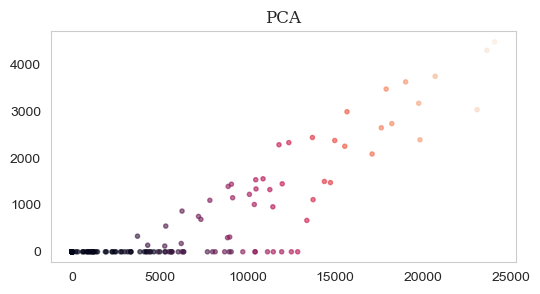

In [9]:
plt.figure(figsize = (6,3))
plt.scatter(result[0], result[1], c = result[2], marker = '.', alpha = 0.6)
plt.grid(False)
plt.title("PCA", fontsize = 12, fontfamily = 'Serif')

#### GMM

In [10]:
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

n_clusters = 3
gmm = GaussianMixture(n_components = n_clusters, random_state = 42)
gmm_clusters = gmm.fit_predict(X)

df = pd.DataFrame(X)
df['Cluster'] = gmm_clusters

df.head()

,populaion,foreign_rate,bsc_lvlhood_ratio,avg_income_amt,elder_ratio,spread,built_year,density,crime,Cluster
종로구사직동,9362.0,0.029160,0.027352,8.753692,0.203605,0.402121,26.422436,7606.0,0.46,0
종로구부암동,9377.0,0.028261,0.042151,8.567173,0.202824,-0.416352,26.440842,4201.0,0.26,0
종로구무악동,8015.0,0.003868,0.068439,8.381916,0.187718,0.289968,22.173438,22367.0,0.52,1
종로구교남동,9916.0,0.016841,0.049143,8.523287,0.172474,0.402121,16.009137,28554.0,0.52,1
종로구종로5.6가동,5921.0,0.081743,0.088097,8.274808,0.197631,-0.220280,5.460867,9695.0,0.62,0


Text(0, 0.5, 'spread')

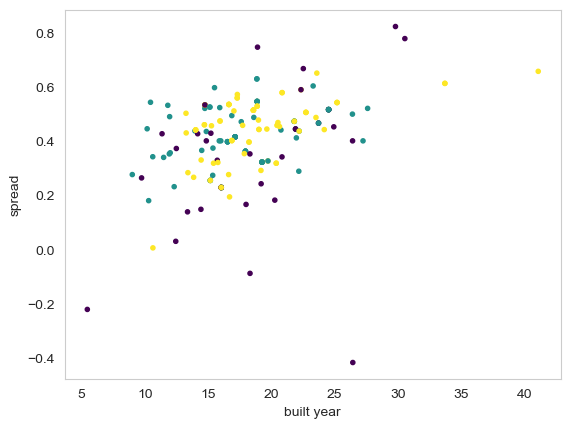

In [11]:
plt.scatter(df['built_year'], df['spread'], c = df['Cluster'], marker = '.', cmap = 'viridis')
plt.grid(False)
plt.xlabel('built year')
plt.ylabel('spread')

In [12]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=3, random_state=42)
X_tsne = tsne.fit_transform(X)

In [13]:
result.iloc[:,[0,1,2]]

,0,1,2
종로구사직동,1373.742798,0.000000,181.540421
종로구부암동,3739.178955,332.323425,1511.877930
종로구무악동,0.000000,0.000000,0.000000
종로구교남동,0.000000,0.000000,0.000000
종로구종로5.6가동,0.000000,0.000000,0.000000
...,...,...,...
송파구잠실2동,13743.304688,1111.723877,5533.958008
송파구잠실3동,8016.994629,0.000000,2476.851807
송파구잠실7동,0.000000,0.000000,0.000000
송파구위례동,19833.197266,2386.897705,8270.381836


Text(0.5, 1.0, 't-SNE Dimension Reduction')

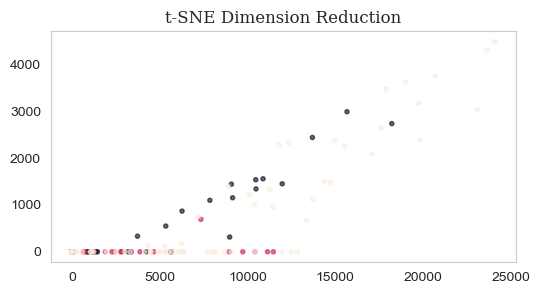

In [14]:
plt.figure(figsize = (6,3))
plt.scatter(result[0], result[1], c = df['Cluster'], marker = '.', alpha = 0.6)
plt.grid(False)
plt.title("t-SNE Dimension Reduction", fontsize = 12, fontfamily = 'Serif')

#### PCA

In [15]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist, squareform

correlation = X.corr()
distances = np.sqrt((1 - correlation) / 2)
clusters = linkage(squareform(distances), method="single")

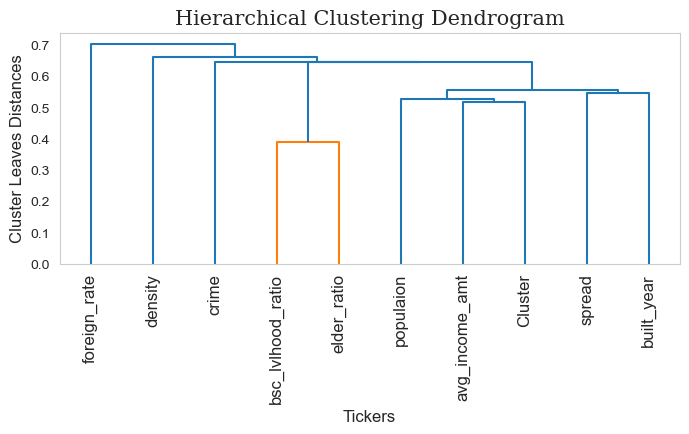

In [16]:
columns = X.columns
plt.figure(figsize=(8, 3))
dendrogram(clusters, labels=columns)
plt.xlabel('Tickers', fontsize=12)
plt.ylabel('Cluster Leaves Distances', fontsize=12)
plt.grid(False)
plt.title('Hierarchical Clustering Dendrogram', fontsize = 15, fontfamily = 'Serif')
plt.xticks(rotation = 90)
plt.show()

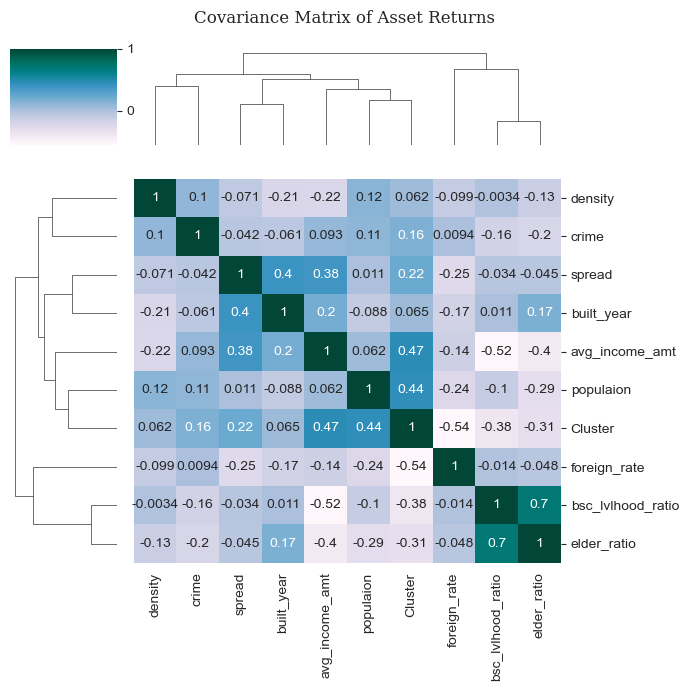

In [17]:
import seaborn as sns
covariance = X.corr()
g = sns.clustermap(covariance, figsize = (7,7), cmap = 'PuBuGn', annot = True)
g.fig.suptitle('Covariance Matrix of Asset Returns', fontsize = 12, fontfamily = 'Serif')
plt.tight_layout()
plt.show()

In [18]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 4)
pca.fit(X)

PCA(n_components=4)

In [19]:
pc_scores = pca.transform(X)
print(pca.components_)

[[ 2.76721664e-01 -4.89028607e-07 -1.36711119e-07 -7.21114135e-06
  -6.68886900e-07 -8.93434094e-07 -9.11804186e-05  9.60950109e-01
   1.95970293e-06  1.03104822e-05]
 [ 9.60950112e-01 -8.32809739e-07 -6.56700796e-07  6.44298279e-06
  -1.10627403e-06  6.17863171e-07 -7.64849612e-06 -2.76721666e-01
   1.47001783e-06  3.40849891e-05]
 [ 3.18788947e-05 -1.71235427e-03  2.22701637e-05  1.48850341e-02
   1.13212883e-03  1.33923608e-02  9.99641826e-01  8.56097569e-05
  -1.33938855e-03  1.75864802e-02]
 [ 3.52443172e-05  2.28691976e-02  3.75476483e-02 -3.84296715e-01
   1.72970611e-02 -5.48826402e-02  2.25961932e-02 -9.68076859e-07
  -3.91166007e-02 -9.19255796e-01]]


#### DBSCAN

In [20]:
from sklearn.cluster import KMeans

n_clusters = 3
kmeans = KMeans(n_clusters = n_clusters, random_state = 42)
kmeans.fit(X)

labels = kmeans.labels_

In [21]:
X['cluster_kmeans'] = labels

In [22]:
X

,populaion,foreign_rate,bsc_lvlhood_ratio,avg_income_amt,elder_ratio,spread,built_year,density,crime,Cluster,cluster_kmeans
종로구사직동,9362.0,0.029160,0.027352,8.753692,0.203605,0.402121,26.422436,7606.0,0.46,0,0
종로구부암동,9377.0,0.028261,0.042151,8.567173,0.202824,-0.416352,26.440842,4201.0,0.26,0,0
종로구무악동,8015.0,0.003868,0.068439,8.381916,0.187718,0.289968,22.173438,22367.0,0.52,1,0
종로구교남동,9916.0,0.016841,0.049143,8.523287,0.172474,0.402121,16.009137,28554.0,0.52,1,1
종로구종로5.6가동,5921.0,0.081743,0.088097,8.274808,0.197631,-0.220280,5.460867,9695.0,0.62,0,0
...,...,...,...,...,...,...,...,...,...,...,...
송파구잠실2동,35034.0,0.002969,0.002853,9.244339,0.114272,0.536534,16.649224,15998.0,0.90,2,2
송파구잠실3동,34110.0,0.003987,0.004562,9.244339,0.184617,0.536534,16.649224,22915.0,0.90,2,2
송파구잠실7동,9433.0,0.001272,0.003260,9.244339,0.245123,0.536534,16.649224,15712.0,0.90,2,0
송파구위례동,44802.0,0.002902,0.074755,8.545905,0.084682,0.503968,13.257704,17495.0,0.48,2,2


Clustering 결과 확인

In [31]:
renewal = pd.read_csv('../Data/renewal.csv', index_col = 0, encoding = 'cp949')

In [33]:
renewal[['자치구','법정동','사업구분']]

,자치구,법정동,사업구분
사업번호,,,
11110-100002009,종로구,무악동,재건축
11110-100002000,종로구,신영동,재개발(주택정비형)
11110-900000727,종로구,교남동,재개발(주택정비형)
11110-900001050,종로구,창신동,재개발(주택정비형)
11110-100003002,종로구,교남동,재개발(도시정비형)
...,...,...,...
11710-900000938,송파구,풍납동,리모델링
11710-900000939,송파구,문정동,리모델링
11710-900000940,송파구,오금동,리모델링


In [34]:
renewal.index = renewal['자치구'] + renewal['법정동']

In [41]:
renewal

,자치구,법정동,사업구분,운영구분,추진위원회/조합명,대표지번,진행단계,상태,정비구역명칭,정비구역위치,...,지상층수,지하층수,건설세대총수,60미만건설세대수,60이상85이하건설세대수,85초과건설세대수,건축계획비고,위치도,조감도,배치도
종로구무악동,종로구,무악동,재건축,조합청산,무악연립제2주택재건축정비사업조합,무악동 71-1,조합청산,운영,무악연립제2주택재건축정비사업조합,종로구 무악동 71-1 외 13필지,...,17.0,3.0,NaN,NaN,134.0,33.0,NaN,https://cleanup.seoul.go.kr/servlet/image/assc...,https://cleanup.seoul.go.kr/servlet/image/assc...,https://cleanup.seoul.go.kr/servlet/image/assc...
종로구신영동,종로구,신영동,재개발(주택정비형),조합,신영제1구역 주택재개발정비사업조합,신영동 158-2,관리처분인가,운영,신영제1구역 주택재개발정비사업,종로구 신영동 158-2번지,...,7.0,3.0,199.0,41.0,123.0,35.0,NaN,https://cleanup.seoul.go.kr/servlet/image/assc...,https://cleanup.seoul.go.kr/servlet/image/assc...,https://cleanup.seoul.go.kr/servlet/image?url=...
종로구교남동,종로구,교남동,재개발(주택정비형),공공지원자,돈의문2구역 도시정비형 재개발사업(신탁시행자 방식),교남동 28,정비구역지정,운영,도시정비형 재개발사업,종로구 교남동 28-0,...,21.0,5.0,379.0,284.0,85.0,10.0,85초과없어 저장안됨,NaN,NaN,NaN
종로구창신동,종로구,창신동,재개발(주택정비형),추진위원회,창신동23?숭인동56일대 주택재개발 정비사업(추정분담금 계산용 홈페이지),창신동 23-2,조합설립추진위원회승인,운영,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
종로구교남동,종로구,교남동,재개발(도시정비형),조합,돈의문1구역도시환경정비사업조합,교남동 62-1,조합해산,운영,돈의문1구역도시환경정비사업조합,종로구 교남동 62-1,...,21.0,5.0,2048.0,603.0,958.0,487.0,NaN,https://cleanup.seoul.go.kr/servlet/image/assc...,https://cleanup.seoul.go.kr/servlet/image/assc...,https://cleanup.seoul.go.kr/servlet/image/assc...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
송파구풍납동,송파구,풍납동,리모델링,조합,강변현대아파트 리모델링사업조합,풍납동 299-1,조합설립인가,운영,강변현대아파트 리모델링사업조합,송파구 풍납동 299-1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
송파구문정동,송파구,문정동,리모델링,조합,문정건영아파트 리모델링주택조합,문정동 72-3,조합설립인가,운영,문정건영아파트 리모델링주택조합,송파구 문정동 72-3,...,18.0,4.0,NaN,NaN,NaN,81.0,NaN,https://cleanup.seoul.go.kr/servlet/image?url=...,https://cleanup.seoul.go.kr/servlet/image?url=...,https://cleanup.seoul.go.kr/servlet/image?url=...
송파구오금동,송파구,오금동,리모델링,조합,오금아남아파트 리모델링주택조합,오금동 67-7,조합설립인가,운영,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
송파구가락동,송파구,가락동,리모델링,조합,가락쌍용1차아파트 리모델링주택조합,가락동 140,조합설립인가,운영,가락쌍용1차아파트 리모델링주택조합,송파구 가락동 140-0,...,27.0,5.0,NaN,NaN,NaN,NaN,NaN,https://cleanup.seoul.go.kr/servlet/image?url=...,https://cleanup.seoul.go.kr/servlet/image?url=...,https://cleanup.seoul.go.kr/servlet/image?url=...


In [27]:
print(X[X['cluster_kmeans'] == 0].index) # 재개발 도시정비형 + 재건축, 즉 대규모 재개발 단지

Index(['종로구사직동', '종로구부암동', '종로구무악동', '종로구종로5.6가동', '중구신당동', '용산구후암동', '용산구남영동',
       '용산구효창동', '용산구서빙고동', '용산구보광동', '용산구청파동', '용산구한강로동', '용산구한남동', '성동구마장동',
       '성동구사근동', '성동구용답동', '성동구옥수동', '동대문구회기동', '동대문구청량리동', '중랑구신내2동',
       '성북구성북동', '성북구동선동', '강북구번2동', '강북구번3동', '강북구수유1동', '강북구우이동', '노원구월계1동',
       '노원구월계2동', '노원구중계4동', '노원구상계10동', '노원구상계3.4동', '은평구증산동', '은평구수색동',
       '서대문구천연동', '서대문구충현동', '마포구대흥동', '마포구서강동', '양천구신월3동', '양천구신월5동',
       '양천구신월7동', '강서구공항동', '구로구수궁동', '금천구가산동', '영등포구영등포본동', '영등포구도림동',
       '관악구남현동', '관악구낙성대동', '관악구난향동', '관악구대학동', '관악구삼성동', '서초구서초1동', '서초구잠원동',
       '서초구반포본동', '서초구반포2동', '서초구반포3동', '서초구반포4동', '서초구방배1동', '서초구방배2동',
       '서초구방배3동', '서초구양재2동', '강남구신사동', '강남구논현1동', '강남구논현2동', '강남구삼성1동',
       '강남구도곡1동', '강남구개포1동', '강남구개포4동', '강남구일원본동', '강남구일원1동', '강남구압구정동',
       '강남구청담동', '송파구풍납1동', '송파구풍납2동', '송파구거여1동', '송파구마천2동', '송파구오륜동',
       '송파구잠실7동'],
      dtype='object')


In [28]:
print(X[X['cluster_kmeans'] == 1].index) # 재개발(주택정비형)

Index(['종로구교남동', '중구황학동', '중구중림동', '중구다산동', '중구약수동', '중구청구동', '중구동화동',
       '성동구응봉동', '성동구왕십리도선동', '중랑구면목본동', '성북구삼선동', '강북구번1동', '강북구수유2동',
       '강북구수유3동', '강북구삼양동', '강북구미아동', '강북구송중동', '강북구송천동', '강북구삼각산동', '노원구상계2동',
       '노원구상계5동', '노원구상계8동', '노원구상계9동', '은평구대조동', '서대문구북아현동', '마포구용강동',
       '마포구염리동', '마포구신수동', '마포구도화동', '마포구공덕동', '마포구아현동', '양천구목2동', '양천구목3동',
       '양천구목4동', '양천구신월1동', '양천구신월2동', '양천구신월4동', '양천구신월6동', '양천구신정1동',
       '양천구신정2동', '양천구신정4동', '양천구신정6동', '강서구화곡본동', '구로구가리봉동', '관악구보라매동',
       '관악구청림동', '관악구행운동', '관악구중앙동', '관악구인헌동', '관악구서원동', '관악구신원동', '관악구서림동',
       '관악구신사동', '관악구신림동', '관악구조원동', '관악구은천동', '관악구성현동', '관악구난곡동', '서초구서초4동',
       '서초구반포1동', '서초구방배본동', '서초구방배4동', '강남구대치1동', '강남구대치4동', '강남구도곡2동',
       '송파구거여2동', '송파구마천1동', '송파구방이1동', '송파구방이2동', '송파구송파1동', '송파구송파2동',
       '송파구석촌동', '송파구가락2동', '송파구문정1동', '송파구잠실본동'],
      dtype='object')


In [29]:
print(X[X['cluster_kmeans'] == 2].index) # 가로주택정비, 도시재생형

Index(['광진구화양동', '광진구광장동', '동대문구용신동', '동대문구제기동', '중랑구신내1동', '중랑구망우본동',
       '성북구종암동', '성북구석관동', '강북구인수동', '노원구월계3동', '노원구공릉1동', '노원구공릉2동',
       '노원구상계1동', '노원구상계6.7동', '은평구녹번동', '은평구구산동', '은평구역촌동', '서대문구연희동',
       '양천구목1동', '양천구목5동', '양천구신정3동', '양천구신정7동', '강서구염창동', '강서구우장산동',
       '영등포구여의동', '영등포구영등포동', '동작구대방동', '동작구흑석동', '관악구청룡동', '관악구미성동',
       '서초구서초2동', '서초구서초3동', '서초구양재1동', '강남구삼성2동', '강남구대치2동', '강남구역삼1동',
       '강남구역삼2동', '강남구개포2동', '송파구오금동', '송파구가락본동', '송파구가락1동', '송파구문정2동',
       '송파구장지동', '송파구잠실2동', '송파구잠실3동', '송파구위례동', '강동구길동'],
      dtype='object')
